In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('dengue_2018_2.csv', header=0)
classfication_variables = ["tp_gestante", "tp_escolaridade", "tp_classificacao_final", 
                           "notificao_dias", "idade", "tp_raca_cor", 
                           "co_bairro_residencia", "caso_internacao", 'tp_sexo', "febre", "mialgia", 
                           "cefaleia", "exantema", "vomito", "nausea", "dor_costas", "conjutivite", 
                           "artrite", "artralgia", "petequia_n", "leucopenia", "laco", 
                           "dor_retro", "diabetes", "hematolog", "hepatopat", "renal", "hipertensao", "acido_pept", 
                           "auto_imune"]

data = data[classfication_variables]
print(data.shape)
print(list(data.columns))

(2468, 30)
['tp_gestante', 'tp_escolaridade', 'tp_classificacao_final', 'notificao_dias', 'idade', 'tp_raca_cor', 'co_bairro_residencia', 'caso_internacao', 'tp_sexo', 'febre', 'mialgia', 'cefaleia', 'exantema', 'vomito', 'nausea', 'dor_costas', 'conjutivite', 'artrite', 'artralgia', 'petequia_n', 'leucopenia', 'laco', 'dor_retro', 'diabetes', 'hematolog', 'hepatopat', 'renal', 'hipertensao', 'acido_pept', 'auto_imune']


In [3]:
data['caso_internacao'].value_counts()

0    2278
1     190
Name: caso_internacao, dtype: int64

In [7]:
count_goods = len(data[data['caso_internacao']==0])
count_bads = len(data[data['caso_internacao']==1])
pct_of_bads= count_bads/(count_bads+count_goods)
print("percentage of bads is", pct_of_bads*100)
pct_of_good = count_goods/(count_bads+count_goods)
print("percentage of subscription", pct_of_good*100)

percentage of bads is 7.698541329011345
percentage of subscription 92.30145867098865


In [8]:
# bairro_cat = pd.get_dummies(data_final["co_bairro_residencia"], prefix='bairro')
gestante_cat = pd.get_dummies(data["tp_gestante"], prefix='gestante')
escolaridade_cat = pd.get_dummies(data["tp_escolaridade"], prefix='escolaridade')
raca_cat = pd.get_dummies(data["tp_raca_cor"], prefix='raca')
sexo_cat = pd.get_dummies(data["tp_sexo"], prefix='sexo')

# bairro_cat, gestante_cat, , escolaridade_cat, raca_cat,classificacao_cat
data_dummies = pd.concat([data, gestante_cat], axis=1)
data_dummies = pd.concat([data_dummies, escolaridade_cat], axis=1)
data_dummies = pd.concat([data_dummies, raca_cat], axis=1)
data_dummies = pd.concat([data_dummies, sexo_cat], axis=1)

data_dummies = data_dummies.drop(["tp_gestante", "gestante_9", "gestante_6", "gestante_5"], axis=1)
data_dummies = data_dummies.drop(["tp_escolaridade", "escolaridade_9", "escolaridade_10"], axis=1)
data_dummies = data_dummies.drop(["tp_raca_cor", "raca_9", "raca_5", "raca_3"], axis=1)
data_dummies = data_dummies.drop(["tp_sexo", "sexo_I", "sexo_M"], axis=1)
data_dummies = data_dummies.drop(["tp_classificacao_final"], axis=1)
data_dummies = data_dummies.drop(["co_bairro_residencia"], axis=1)



data_dummies.head()
# cat_vars=["tp_sexo", "tp_gestante", "tp_escolaridade", "tp_classificacao_final"]
# for var in cat_vars:
#     cat_list='var'+'_'+var
#     cat_list = pd.get_dummies(data[var], prefix=var)
#     data1=data.join(cat_list)
#     data=data1
# cat_vars=["tp_sexo", "tp_gestante"]
# data_vars=data.columns.values.tolist()
# to_keep=[i for i in data_vars if i not in cat_vars]

# data_final=data[to_keep]
# data_final.columns.values

,notificao_dias,idade,caso_internacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,...,escolaridade_3,escolaridade_4,escolaridade_5,escolaridade_6,escolaridade_7,escolaridade_8,raca_1,raca_2,raca_4,sexo_F
0,5,37,0,2,1,1,2,2,2,2,...,0,0,0,0,0,0,1,0,0,1
1,26,1,1,1,2,2,1,2,2,2,...,0,0,0,0,0,0,1,0,0,0
2,1,14,0,1,1,1,2,2,2,2,...,0,0,0,0,0,0,0,0,1,0
3,89,41,0,2,2,1,1,2,2,2,...,0,0,0,0,0,0,0,0,0,1
4,3,12,0,1,2,1,2,1,2,2,...,0,0,0,0,0,0,0,0,1,0


In [9]:
X = data_dummies.loc[:, data_dummies.columns != 'caso_internacao']
y = data_dummies.loc[:, data_dummies.columns == 'caso_internacao']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# data_train = pd.concat([X_train, y_train], axis=1)
# data_train.head()
# data_train["caso_internacao"].value_counts()

In [11]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train['caso_internacao'],X_train)
result=logit_model.fit()
result.summary2()

         Current function value: 0.164808
         Iterations: 35


C:\Users\bruno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.376     
Dependent Variable:   caso_internacao    AIC:                649.2476  
Date:                 2019-07-02 15:41   BIC:                867.4133  
No. Observations:     1727               Log-Likelihood:     -284.62   
Df Model:             39                 LL-Null:            -456.20   
Df Residuals:         1687               LLR p-value:        2.6748e-50
Converged:            0.0000             Scale:              1.0000    
No. Iterations:       35.0000                                          
-----------------------------------------------------------------------
                Coef.    Std.Err.    z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------
notificao_dias   0.0115    0.0089  1.2832 0.1994     -0.0060     0.0290
idade           -0.0358    0.0107 -3.3332 0.0009     -0.0568    -0.0147
febre           -0.5645    0.5668 -0.9959 0.3193     -1.6754     0.5465
mialgia         -0.5861    0.2687 -2.1810 0.0292     -1.1128    -0.0594
cefaleia         0.4901    0.2534  1.9344 0.0531     -0.0065     0.9867
exantema         0.1158    0.2692  0.4303 0.6670     -0.4118     0.6434
vomito          -0.8509    0.2575 -3.3047 0.0010     -1.3555    -0.3462
nausea          -1.0437    0.2744 -3.8037 0.0001     -1.5815    -0.5059
dor_costas       0.8122    0.4772  1.7020 0.0888     -0.1231     1.7475
conjutivite      0.0521    0.7520  0.0693 0.9447     -1.4219     1.5261
artrite          0.1345    0.5186  0.2594 0.7953     -0.8819     1.1510
artralgia       -0.4202    0.3391 -1.2394 0.2152     -1.0848     0.2443
petequia_n      -2.1631    0.3688 -5.8646 0.0000     -2.8859    -1.4402
leucopenia      -1.9242    0.2779 -6.9252 0.0000     -2.4688    -1.3796
laco             1.6335    1.2028  1.3580 0.1745     -0.7240     3.9910
dor_retro       -0.3466    0.3527 -0.9827 0.3258     -1.0379     0.3447
diabetes         0.2389    0.8998  0.2656 0.7906     -1.5246     2.0024
hematolog       -3.7221    1.4275 -2.6074 0.0091     -6.5199    -0.9242
hepatopat       -2.4138    1.3127 -1.8388 0.0659     -4.9867     0.1591
renal           -1.8176    2.0165 -0.9013 0.3674     -5.7699     2.1347
hipertensao     -1.2321    0.7583 -1.6249 0.1042     -2.7183     0.2540
acido_pept       0.1966    2.0547  0.0957 0.9238     -3.8306     4.2238
auto_imune      10.9960    3.2234  3.4114 0.0006      4.6784    17.3137
gestante_1      -0.9122    1.4334 -0.6364 0.5245     -3.7216     1.8972
gestante_2     -14.3451 1290.3533 -0.0111 0.9911  -2543.3911  2514.7009
gestante_3       0.5584    1.2675  0.4405 0.6595     -1.9258     3.0426
gestante_4     -13.6587 7446.3465 -0.0018 0.9985 -14608.2297 14580.9123
escolaridade_0   0.2831    2.0643  0.1372 0.8909     -3.7629     4.3292
escolaridade_1   0.1859    0.7735  0.2403 0.8101     -1.3303     1.7020
escolaridade_2   1.4708    1.1085  1.3268 0.1846     -0.7019     3.6435
escolaridade_3   2.5145    0.6295  3.9943 0.0001      1.2807     3.7483
escolaridade_4   1.4906    1.2347  1.2073 0.2273     -0.9293     3.9105
escolaridade_5   1.0322    0.8639  1.1947 0.2322     -0.6611     2.7255
escolaridade_6   0.4675    0.6414  0.7289 0.4661     -0.7896     1.7247
escolaridade_7   1.4801    0.8852  1.6720 0.0945     -0.2549     3.2150
escolaridade_8   0.2288    0.7453  0.3070 0.7589     -1.2320     1.6896
raca_1           1.2726    0.4258  2.9888 0.0028      0.4381     2.1072
raca_2           2.6680    0.8496  3.1402 0.0017      1.0027     4.3332
raca_4           1.9546    0.2738  7.1396 0.0000      1.4180     2.4911
sexo_F          -0.1898    0.2432 -0.7807 0.4350     -0.6664     0.2868
=======================================================================

"""

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = X_train
y = y_train['caso_internacao']
logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [133]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[671,   8],
       [ 50,  12]], dtype=int64)

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       679
           1       0.60      0.19      0.29        62

   micro avg       0.92      0.92      0.92       741
   macro avg       0.77      0.59      0.63       741
weighted avg       0.90      0.92      0.90       741



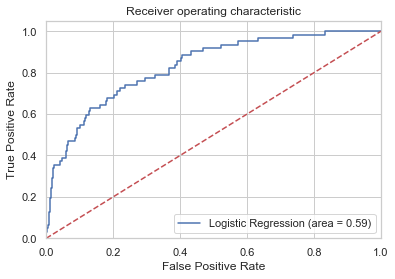

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [220]:
# Teste with 30% of classe bad replicated

data_train = pd.concat([X_train, y_train], axis=1)

bads = data_train[data_train["caso_internacao"] == 1]
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)
data_train = data_train.append(bads)



data_train['caso_internacao'].value_counts()

0    1599
1    1536
Name: caso_internacao, dtype: int64

In [221]:
X = data_train.loc[:, data_train.columns != 'caso_internacao']
y = data_train.loc[:, data_train.columns == 'caso_internacao']

import statsmodels.api as sm
logit_model=sm.Logit(y['caso_internacao'],X)
result=logit_model.fit()
result.summary2()

         Current function value: 0.382240
         Iterations: 35


C:\Users\bruno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                               Results: Logit
=============================================================================================================================================================================
Model:                                                   Logit                                                Pseudo R-squared:                                     0.448    
Dependent Variable:                                      caso_internacao                                      AIC:                                                  2476.6477
Date:                                                    2019-06-30 23:17                                     BIC:                                                  2718.6630
No. Observations:                                        3135                                                 Log-Likelihood:                                       -1198.3  
Df Model:                                                39                                                   LL-Null:                                              -2172.4  
Df Residuals:                                            3095                                                 LLR p-value:                                          0.0000   
Converged:                                               0.0000                                               Scale:                                                1.0000   
No. Iterations:                                          35.0000                                                                                                             
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                 Coef.                     Std.Err.                     z     P>|z|                     [0.025                                       0.975]                  
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
notificao_dias    0.0151                                      0.0050   3.0397 0.0024                                       0.0054                                      0.0248
idade            -0.0333                                      0.0043  -7.8004 0.0000                                      -0.0417                                     -0.0249
febre            -1.1472                                      0.2487  -4.6120 0.0000                                      -1.6348                                     -0.6597
mialgia          -0.5001                                      0.1235  -4.0480 0.0001                                      -0.7422                                     -0.2579
cefaleia          0.8488                                      0.1169   7.2611 0.0000                                       0.6197                                      1.0779
exantema         -0.0017                                      0.1258  -0.0133 0.9894                                      -0.2482                                      0.2449
vomito           -0.9684                                      0.1220  -7.9380 0.0000                                      -1.2075                                     -0.7293
nausea           -0.8173                                      0.1340  -6.1013 0.0000                                      -1.0798                                     -0.5547
dor_costas        0.5124                                      0.2184   2.3462 0.0190                                       0.0844                                      0.9404
conjutivite      -0.0739                                      0.3759  -0.1967 0.8440                                      -0.8106                                      0.6627
artrite           0.6738     

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
y = y['caso_internacao']
logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [223]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [224]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[518, 161],
       [ 19,  43]], dtype=int64)

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       679
           1       0.21      0.69      0.32        62

   micro avg       0.76      0.76      0.76       741
   macro avg       0.59      0.73      0.59       741
weighted avg       0.90      0.76      0.81       741



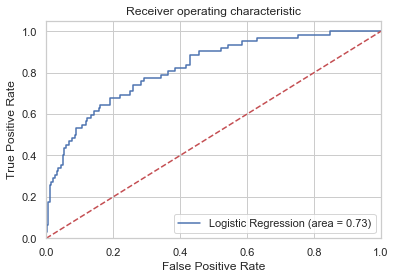

In [226]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [249]:
data_dummies.head()

,notificao_dias,idade,caso_internacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,...,escolaridade_3,escolaridade_4,escolaridade_5,escolaridade_6,escolaridade_7,escolaridade_8,raca_1,raca_2,raca_4,sexo_F
0,5,37,0,2,1,1,2,2,2,2,...,0,0,0,0,0,0,1,0,0,1
1,26,1,1,1,2,2,1,2,2,2,...,0,0,0,0,0,0,1,0,0,0
2,1,14,0,1,1,1,2,2,2,2,...,0,0,0,0,0,0,0,0,1,0
3,89,41,0,2,2,1,1,2,2,2,...,0,0,0,0,0,0,0,0,0,1
4,3,12,0,1,2,1,2,1,2,2,...,0,0,0,0,0,0,0,0,1,0


In [254]:
X = data_dummies.loc[:, data_dummies.columns != 'caso_internacao']
y = data_dummies.loc[:, data_dummies.columns == 'caso_internacao']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['caso_internacao'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['caso_internacao']==0]))
print("Number of subscription",len(os_data_y[os_data_y['caso_internacao']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['caso_internacao']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['caso_internacao']==1])/len(os_data_X))

length of oversampled data is  3198
Number of no subscription in oversampled data 1599
Number of subscription 1599
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [256]:
import statsmodels.api as sm

X=os_data_X
y=os_data_y['caso_internacao']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.271599
         Iterations: 35
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.608    
Dependent Variable:    caso_internacao     AIC:                 1817.1488
Date:                  2019-06-30 23:35    BIC:                 2059.9601
No. Observations:      3198                Log-Likelihood:      -868.57  
Df Model:              39                  LL-Null:             -2216.7  
Df Residuals:          3158                LLR p-value:         0.0000   
Converged:             0.0000              Scale:               1.0000   
No. Iterations:        35.0000                                           
-------------------------------------------------------------------------
                Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------
notificao_dias   0.0117     0.0067   1.7415 0.0816     -0.0015     0.0248
id

C:\Users\bruno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [258]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [259]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[452,  53],
       [ 56, 399]], dtype=int64)

In [260]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       505
           1       0.88      0.88      0.88       455

   micro avg       0.89      0.89      0.89       960
   macro avg       0.89      0.89      0.89       960
weighted avg       0.89      0.89      0.89       960



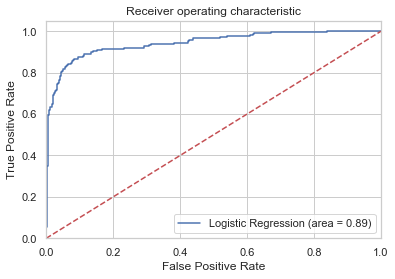

In [261]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()